# Examples using R interface to _NatureDataCube_

**Note:** All examples are currently based on the _AgroDataCube_ [Postman documentation for V2.1](https://documenter.getpostman.com/view/3284162/TVeqd7aa).

## Load functions

In [7]:
source("../R/ndc_url.R")
source("../R/ndc_get.R")

## Examples

In [ ]:
# Load packages
library(httr)
library(jsonlite)
library(geojsonio)

# Set environmental variables
conda_env <- "/home/bruno/.miniconda3/envs/base_r/"
Sys.setenv(
  LD_LIBRARY_PATH = paste0(conda_env, "lib/R/lib"),
  PROJ_LIB = paste0(conda_env, "share/proj"),
  GDAL_DATA = paste0(conda_env, "share/gdal"),
  GDAL_DRIVER_PATH = paste0(conda_env, "lib/gdalplugins")
)

# Define parameters
mytoken <- Sys.getenv("AGRODATACUBE_TOKEN") # Replace by your own token
mypolygon1 <- "POLYGON((4.2 52, 4.2 53, 4.3 53, 4.3 52, 4.2 52))"
mypolygon2 <- "POLYGON((219478 481588.256000001,219478 497638.432,237339.072000001 497638.432,237339.072000001 481588.256000001,219478 481588.256000001))"

### Fields

Requests to retrieve data from the crop registration datasets, see [RVO](https://www.rvo.nl/) website. Several years of crop registrations are available in the Cube. Crop fields change per year, and are recorded by farmers with an indication of the crop that will be grown on the field. The geometries of the fields are provided as-is, and might contain geometric anomalies.

Once the ID of a specific field is known, it can be used to request addition and detailed information for that particular field.

[1] "https://agrodatacube.wur.nl/api/v2/rest/fields?geometry=POLYGON((4.2%2052,%204.2%2053,%204.3%2053,%204.3%2052,%204.2%2052))&epsg=4326&year=2016&cropname=mais&output_epsg=4326"


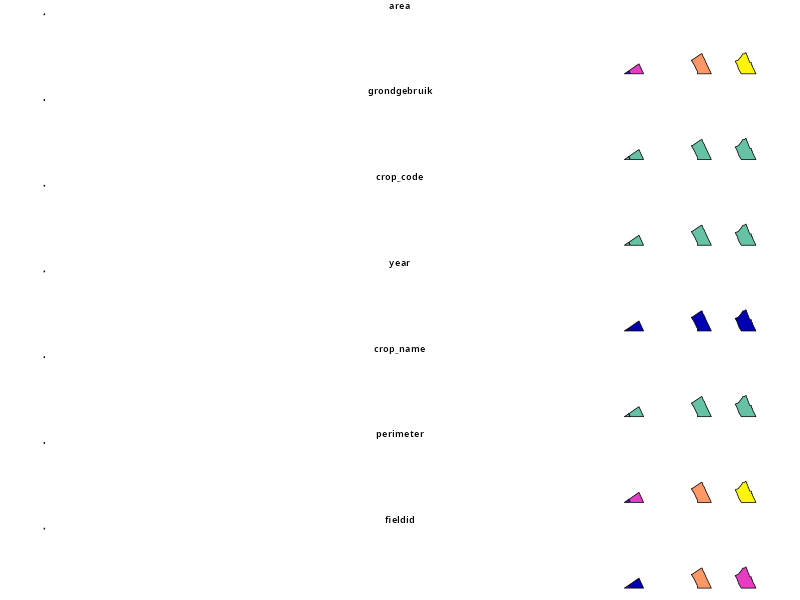

In [24]:
# Fields
myurl <- ndc_url(option = "Fields",
                 params = c(geometry = mypolygon1,
                            epsg = "4326",
                            year = 2016,
                            cropname = "mais",
                            output_epsg = "4326"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

In [109]:
# Retrieve the geometry and crop information of the intersections of the supplied geometry and the fields
myurl <- ndc_url(option = "Fields",
                 params = c(geometry = mypolygon2,
                            fieldid = "9403114",
                            epsg = "28992",
                            output_epsg = "4326",
                            year = 2016,
                            cropcode = "265",
                            cropname = "mais",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(myres_df$metadata)

[1] "https://agrodatacube.wur.nl/api/v2/rest/fields?geometry=POLYGON((219478%20481588.256000001,219478%20497638.432,237339.072000001%20497638.432,237339.072000001%20481588.256000001,219478%20481588.256000001))&fieldid=9403114&epsg=28992&output_epsg=4326&year=2016&cropcode=265&cropname=mais&page_size=25&page_offset=0"
   column_name
1         area
2    crop_code
3    crop_name
4      fieldid
5         geom
6 grondgebruik
7    perimeter
                                                                             description units
1                                                                     Area of a geometry    m2
2                                                   Code for the crop as supplied by RVO  NULL
3 Name of the crop as supplied by RVO. For AgroDataCube harmonized over different years.  NULL
4                   Unique id of a parcel in the AgroDataCube unique per parcel per year  NULL
5 The geometry of an object or intersection depending on the resource and the paramete

In [92]:
# Retrieve the geometry and crop information for a specific crop field
myurl <- ndc_url(option = "Fields",
                 params = c(geometry = mypolygon2,
                            fieldid = "9403114",
                            output_epsg = "4326",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(myres_df$metadata)

[1] "https://agrodatacube.wur.nl/api/v2/rest/fields?geometry=POLYGON((219478%20481588.256000001,219478%20497638.432,237339.072000001%20497638.432,237339.072000001%20481588.256000001,219478%20481588.256000001))&fieldid=9403114&output_epsg=4326&page_offset=0"
   column_name
1         area
2    crop_code
3    crop_name
4      fieldid
5         geom
6 grondgebruik
7    perimeter
                                                                             description units
1                                                                     Area of a geometry    m2
2                                                   Code for the crop as supplied by RVO  NULL
3 Name of the crop as supplied by RVO. For AgroDataCube harmonized over different years.  NULL
4                   Unique id of a parcel in the AgroDataCube unique per parcel per year  NULL
5 The geometry of an object or intersection depending on the resource and the parameters  NULL
6                                                   

### Altitude (AHN)

This folder contains requests to retrieve AHN ('Actueel Hoogtebestand Nederland') data. AHN is provided as Open Data by Rijkswaterstaat.

As of december 2022 AHN2 has been replaced by AHN3.

For more details please see: [Rijkswaterstaat website AHN](https://www.rijkswaterstaat.nl/zakelijk/open-data/actueel-hoogtebestand-nederland/)

In [98]:
# Altitude zonal statistics for supplied geometry
myurl <- ndc_url(option = "AHN",
                 params = c(geometry = mypolygon1,
                            epsg = "4326"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(myres_df$features$properties)

[1] "https://agrodatacube.wur.nl/api/v2/rest/ahn?geometry=POLYGON((4.2%2052,%204.2%2053,%204.3%2053,%204.3%2052,%204.2%2052))&epsg=4326"
       area    min    max  mean
1 755607361 -534.9 3364.6 166.6


In [99]:
# Raster data geotiff for AHN (ahn_image)
myurl <- ndc_url(option = "AHN_image",
                 params = c(geometry = mypolygon1,
                            epsg = "4326",
                            output_epsg = "4326"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
print(prettify(toJSON(myres, auto_unbox = TRUE)))

[1] "https://agrodatacube.wur.nl/api/v2/rest/ahn_image?geometry=POLYGON((4.2%2052,%204.2%2053,%204.3%2053,%204.3%2052,%204.2%2052))&epsg=4326&output_epsg=4326"
{
    "status": "Geometry area (m2) 950792200 exceeds limit of 100000000"
}
 


### Meteo

Requests to retrieve information about ánd from the KNMI (the Royal Netherlands Meteorological Institute) weather stations for which data has been stored in the Cube. This data is provided as Open Data by KNMI, see: <https://data.knmi.nl/>.

Once the ID of a meteostation has been retrieved it can be used to request further details and the weather observations of that particular station.

[1] "https://agrodatacube.wur.nl/api/v2/rest/meteostations?output_epsg=4326&page_size=25&page_offset=0"


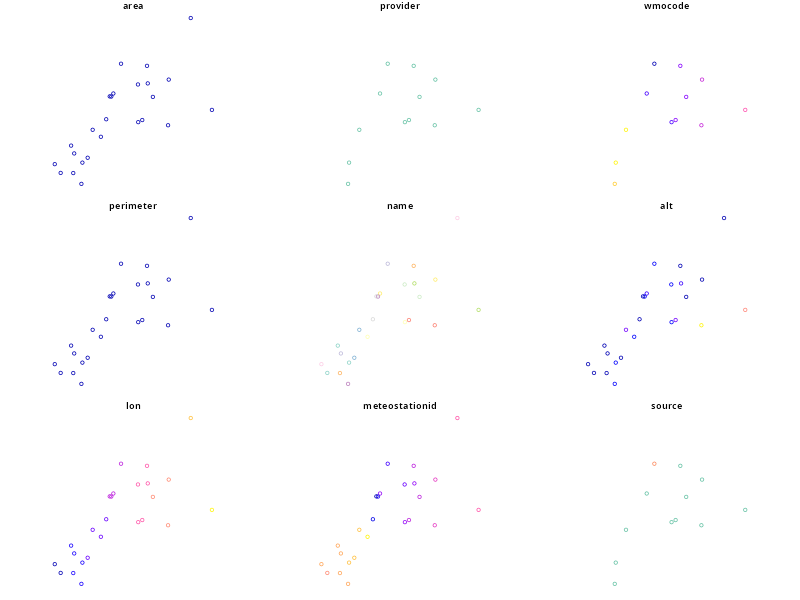

Warning message:
plotting the first 9 out of 10 attributes; use max.plot = 10 to plot all 


In [100]:
# Return a list of all meteostations for which data is available
myurl <- ndc_url(option = "Meteo_stations",
                 params = c(output_epsg = "4326",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

In [101]:
# Return the data for the given meteostation
myurl <- ndc_url(option = "Meteo_stations",
                 params = c(output_epsg = "4326",
                            meteostation = "330",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
print(myres_sf)

[1] "https://agrodatacube.wur.nl/api/v2/rest/meteostations/330?output_epsg=4326&page_size=25&page_offset=0"
Simple feature collection with 1 feature and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 4.122 ymin: 51.992 xmax: 4.122 ymax: 51.992
Geodetic CRS:  WGS 84
  area   provider wmocode perimeter             name   alt   lon meteostationid
1    0 KNMI_DAILY   63300         0 Hoek van Holland 11.86 4.122            330
                                                                                                        source
1 KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI) (http://www.knmi.nl/klimatologie/metadata/debilt.html)
     lat             geometry
1 51.992 POINT (4.122 51.992)


In [ ]:
# Retrieve weather data from one of the meteostations and for a specific date
myurl <- ndc_url(option = "Meteo_data",
                 params = c(output_epsg = "4326",
                            stationid = "210",
                            date = "20160101",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/meteodata?output_epsg=4326&stationid=210&date=20160101&page_size=25&page_offset=0"
[1]  1 20
  meteostationid      datum mean_temperature min_temperature max_temperature sunshine_duration
1            210 2016-01-01              5.6             1.1             8.3               4.1
  global_radiation precipitation mean_sea_level_pressure mean_humidity max_humidity
1              300           1.1                  1021.2            91          100
  potential_evapotranspiration vector_mean_windspeed daily_mean_windspeed max_hourly_mean_windspeed
1                          0.4                   2.7                  3.9                         7
  hourly_division_max_windspeed min_hourly_mean_windspeed hourly_division_min_windspeed
1                            23                         1                             4
  max_gust_windspeed hourly_division_max_gust_windspeed
1                 11                                 22


In [81]:
# Retrieve weather data from one of the meteostations for a specified time period
myurl <- ndc_url(option = "Meteo_data",
                 params = c(output_epsg = "4326",
                            meteostation = "330",
                            fromdate = "20160101",
                            todate = "20251231",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/meteodata?output_epsg=4326&meteostation=330&fromdate=20160101&todate=20251231&page_size=25&page_offset=0"
[1] 25 20
  meteostationid      datum mean_temperature min_temperature max_temperature sunshine_duration
1            330 2016-01-01              6.6             2.8               9               3.5
2            330 2016-01-02              7.2             5.2             9.3               0.8
3            330 2016-01-03              7.1             4.6             8.9                 0
4            330 2016-01-04              6.8             4.7               8               1.6
5            330 2016-01-05              6.9             5.4             7.7                 0
6            330 2016-01-06              6.2             4.8             7.3                 0
  global_radiation precipitation mean_sea_level_pressure mean_humidity max_humidity
1              282             0                  1020.8            87           95
2     

### Soil

Requests to retrieve data about soil conditions from the BOFEK 2012 datasets ánd the Dutch soil map 1:50.000 (2014).

"BOFEK 2012": This is a rather complex but interesting dataset derived from the soil map of the Netherlands. It contains a classification in 72 categories of soil characteristics, and is for example used as input for simulation models.

The dataset is created and provided by WUR. For more information please see <https://www.wur.nl/nl/show/Bodemfysische-Eenhedenkaart-BOFEK2012.htm>.

A soilparamid (soil parameter ID) is needed to request the data. It can be retrieved for a particular field, once the ID of the field is known. Please see the Fields requests.

"Dutch soil map 1:50.000": This dataset is provided by WUR, and also avaible as Open Data. For more information please see <https://www.wur.nl/nl/show/Bodemkaart-1-50-000.htm>.

[1] "https://agrodatacube.wur.nl/api/v2/rest/soilparams?soilparamid=101&page_size=25&page_offset=0"


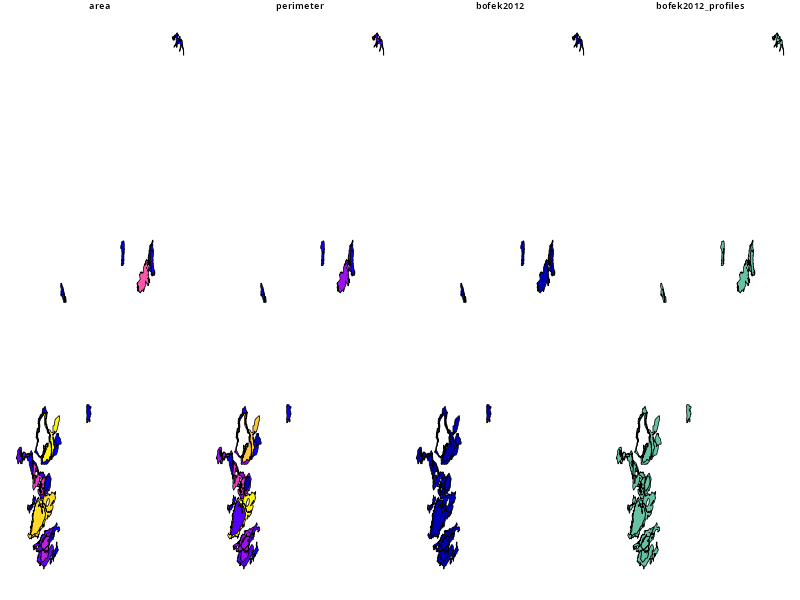

Warning messages:
1: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
2: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
3: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
4: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data


In [154]:
# Return all the information for the given soilparamid
myurl <- ndc_url(option = "Soilparams",
                 params = c(soilparamid = "101",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

[1] "https://agrodatacube.wur.nl/api/v2/rest/soiltypes?geometry=POLYGON((4.2%2052,%204.2%2053,%204.3%2053,%204.3%2052,%204.2%2052))&epsg=4326&output_epsg=4326&page_size=25&page_offset=0"


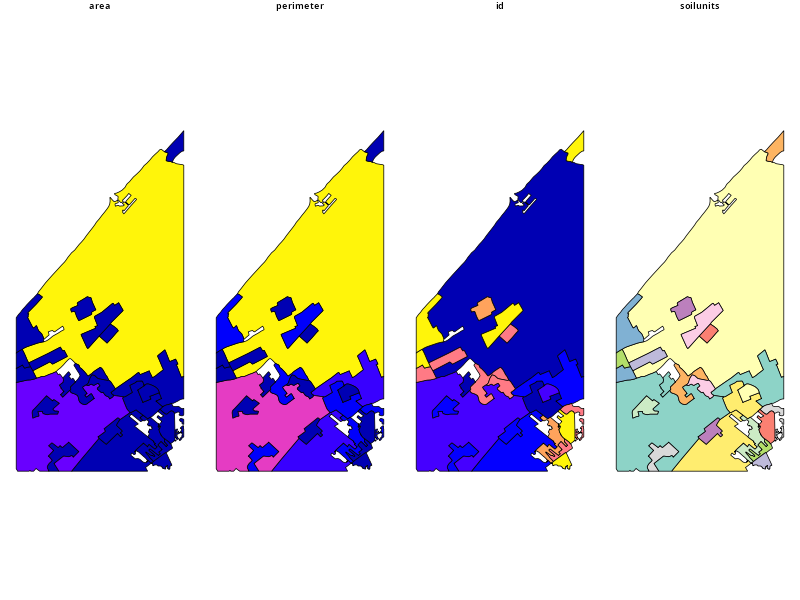

In [11]:
# Return the intersections of the supplied geometry and soilmap
myurl <- ndc_url(option = "Soiltypes",
                 params = c(geometry = mypolygon1,
                            epsg = "4326",
                            output_epsg = "4326",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

[1] "https://agrodatacube.wur.nl/api/v2/rest/soiltypes?entityid=49100&output_epsg=4326&page_size=25&page_offset=0"


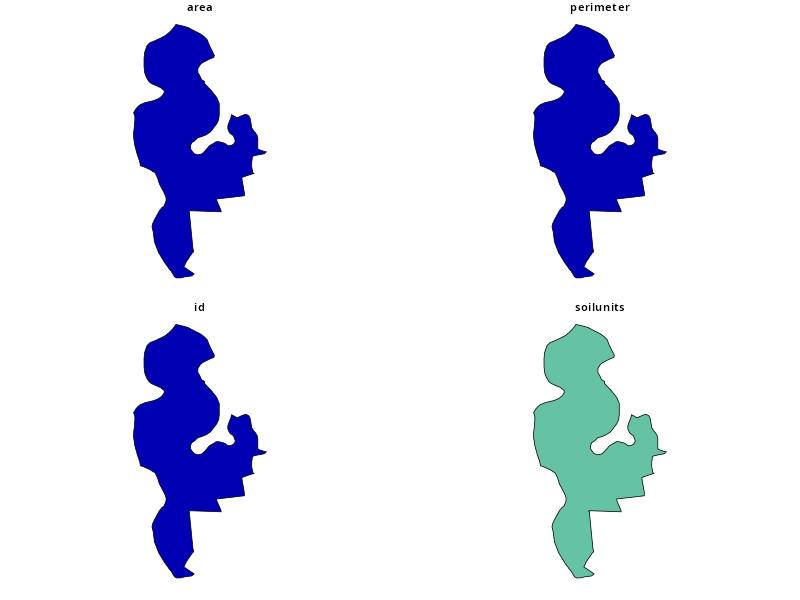

In [12]:
# Return all the information for the given soilmap entityid
myurl <- ndc_url(option = "Soiltypes",
                 params = c(entityid = "49100",
                            output_epsg = "4326",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

### Vegetation (NDVI)

NDVI (Normalized Difference Vegetation Index)

In [105]:
# NDVI statistics
myurl <- ndc_url(option = "NDVI",
                 params = c(geometry = mypolygon2,
                            date = "20191110",
                            epsg = "28992",
                            output_epsg = "4326"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/ndvi?geometry=POLYGON((219478%20481588.256000001,219478%20497638.432,237339.072000001%20497638.432,237339.072000001%20481588.256000001,219478%20481588.256000001))&date=20191110&epsg=28992&output_epsg=4326"
[1] 50  5
       datum ndvi_stddev ndvi_avg fieldid daynr
1 2019-11-10       0.116    0.584 8586606   314
2 2019-11-10      0.0575   0.4804 8586630   314
3 2019-11-10           0    0.532 8586877   314
4 2019-11-10       0.004    0.832 8587020   314
5 2019-11-10           0    0.664 8587122   314
6 2019-11-10       0.021   0.8344 8587413   314


In [103]:
# Raster data geotiff for NDVI (ndvi_image)
myurl <- ndc_url(option = "NDVI_image",
                 params = c(geometry = mypolygon2,
                            date = "20191110",
                            epsg = "28992",
                            output_epsg = "4326"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
print(prettify(toJSON(myres, auto_unbox = TRUE)))

[1] "https://agrodatacube.wur.nl/api/v2/rest/ndvi_image?geometry=POLYGON((219478%20481588.256000001,219478%20497638.432,237339.072000001%20497638.432,237339.072000001%20481588.256000001,219478%20481588.256000001))&date=20191110&epsg=28992&output_epsg=4326"
{
    "status": "Geometry area (m2) 286673349 exceeds limit of 100000000"
}
 


### Codes

Requests to retrieve more details about a specific crop or soil code returned by other requests. These are the code lists as used in the original datasets, e.g. in the crop registration and the soil map.

In [ ]:
# Retrieve a list of all possible cropcodes
myurl <- ndc_url(option = "Cropcodes",
                 params = c(page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/codes/cropcodes?page_size=25&page_offset=0"
[1] 25  7
  cropcode                                         cropname grondgebruik cropid conflict
1     7137                                    Bonen, overig     Bouwland    570    FALSE
2     7138                                         Palmkool     Bouwland    571    FALSE
3     7127                                         Rietland      Overige    563    FALSE
4     7128                               Rietkraag/rietzoom      Overige    564    FALSE
5     7134 Riet in water, anders dan een subsidiabele sloot      Overige    568    FALSE
6     7135                   Riet in een subsidiabele sloot      Overige    569    FALSE
  standard_revenue comment
1             NULL    NULL
2             NULL    NULL
3             NULL    NULL
4             NULL    NULL
5             NULL    NULL
6             NULL    NULL


In [112]:
# Retrieve details for a specific cropcode
myurl <- ndc_url(option = "Cropcodes",
                 params = c(cropcode = "265",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/codes/cropcodes?cropcode=265&page_size=25&page_offset=0"
[1] 5 6
  cropcode                                      cropname grondgebruik cropid conflict
1      265                            Grasland, blijvend     Grasland    209    FALSE
2     2652                                Granen, overig     Bouwland    299    FALSE
3     2653               Graszaad (inclusief klaverzaad)     Bouwland    300    FALSE
4     2650 Erwten inclusief schokkers (droog te oogsten)     Bouwland      8    FALSE
5     2651          Bieten, voeder (inclusief aardperen)     Bouwland    298    FALSE
  standard_revenue
1             1250
2             1670
3             NULL
4             NULL
5             NULL


In [114]:
# Retrieve a list of all possible soilcodes
myurl <- ndc_url(option = "Soilcodes",
                 params = c(page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/codes/soilcodes?page_size=25&page_offset=0"
[1] 25  3
       soilcode     soilname             soiltype
1         Rd10C Lichte zavel    Rivierkleigronden
2 Mn45Av/Mn85Cv   Zware klei       Zeekleigronden
3         AHa|E  Zware zavel          Associaties
4   Mn15A/Mn25A Lichte zavel       Zeekleigronden
5           AHt         Zand          Associaties
6        cZd21g         Zand Kalkloze zandgronden


In [116]:
# Retrieve details for a specific soilcode
myurl <- ndc_url(option = "Soilcodes",
                 params = c(soilcode = "Hn21",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/codes/soilcodes?soilcode=Hn21&page_size=25&page_offset=0"
[1] 25  3
       soilcode       soilname        soiltype
1     Hn21/Zd21           Zand   Podzolgronden
2    Hn21/pZg21           Zand   Podzolgronden
3     Hn21/Hn30           Zand   Podzolgronden
4 kHn21/eMn82Ap   Lichte zavel   Podzolgronden
5     iWpc/Hn21 Moerig op zand Moerige gronden
6    vWpx/Hn21x Moerig op zand Moerige gronden


In [146]:
# Retrieve detailed crop category information
myurl <- ndc_url(option = "Cropcategory",
                 params = c(name = "CAP",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

[1] "https://agrodatacube.wur.nl/api/v2/rest/codes/category?name=CAP&page_size=25&page_offset=0"
[1] 1 6
  category_id name version     beginlifespanversion
1           1  CAP   1.0.0 2022-01-01T00:00:00.000Z
                                             description
1 Grouping of crops for C(ommon) A(gricultural) P(olicy)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### Regions

Requests for retrieving administrative boundaries of provinces, municipalities, and postal code areas, based on 2015 data. These can e.g. be used to calculate aggregated data, or as selection geometries to filter data in other requests.

[1] "https://agrodatacube.wur.nl/api/v2/rest/regions/municipalities?output_epsg=4326&page_size=25&page_offset=0"
[1] 25  4
       area perimeter  id             name
1 838724702  171387.4 308  Súdwest-Fryslân
2 765388626  119020.7 158         Lelystad
3 673999999  104868.6 362     Terschelling
4 662069367    124086 175   Hollands Kroon
5 595410905  125190.3 133  Noordoostpolder
6 549109040  143153.6 319 De Fryske Marren


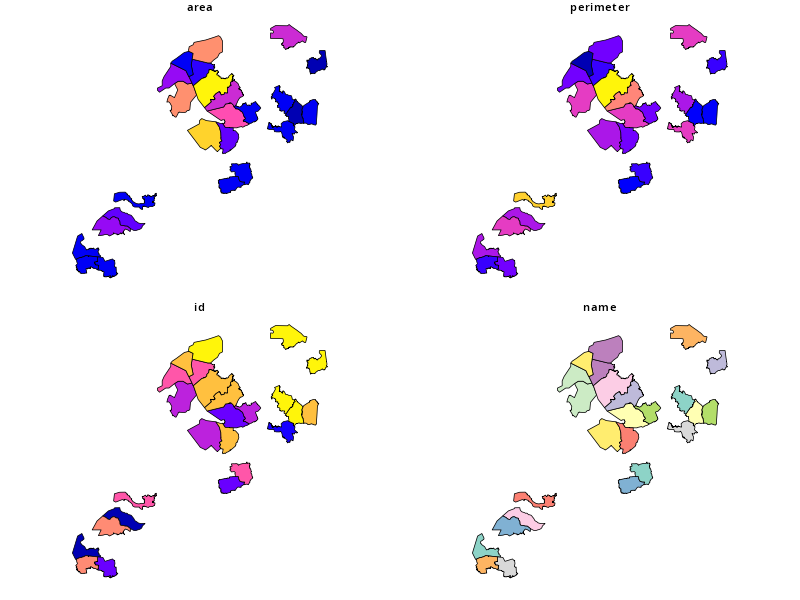

In [145]:
# Return all region boundaries based on municipalities
myurl <- ndc_url(option = "Municipalities",
                 params = c(output_epsg = "4326",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

[1] "https://agrodatacube.wur.nl/api/v2/rest/regions/postalcodes?output_epsg=4326&page_size=25&page_offset=0"
[1] 25  4
       area perimeter     id postcode
1 410441715  91088.11 403343   8244PB
2 403366190  108552.2 454964   9979XX
3 319397224  88601.67 419369   8862NZ
4 250510474  85933.01 419737   8897HE
5 227928195  91628.78 402946   8242PZ
6 206176550  95990.57 419622   8881HG


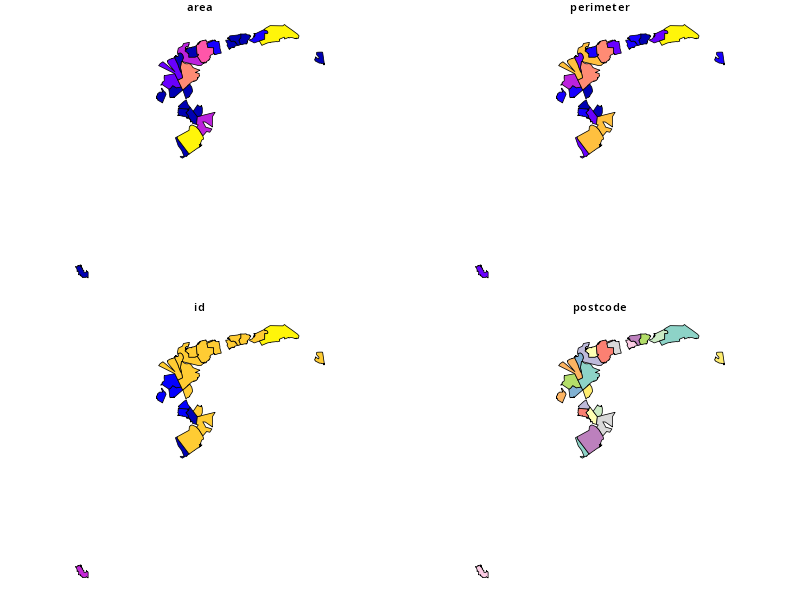

In [147]:
# Return all region boundaries based on postal codes
myurl <- ndc_url(option = "Postalcodes",
                 params = c(output_epsg = "4326",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

[1] "https://agrodatacube.wur.nl/api/v2/rest/regions/provinces?output_epsg=4326&page_size=25&page_offset=0"
[1] 12  4
        area perimeter id          name
1 5748751544  382644.1  5       Fryslân
2 5136514976  561381.7  3    Gelderland
3 5081754945  518496.7  9 Noord-Brabant
4 4091738584  394724.8 10 Noord-Holland
5 3420863133    425722  8    Overijssel
6 3418526942  347276.4  1  Zuid-Holland


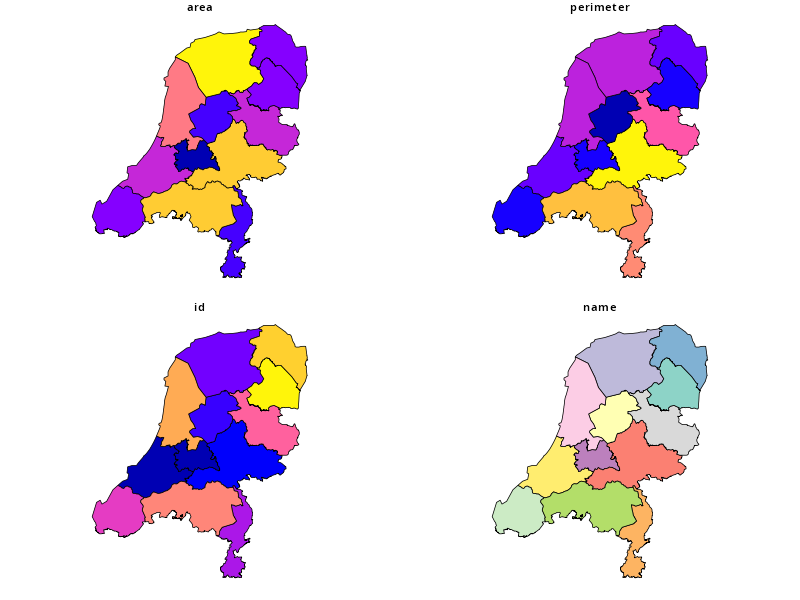

In [148]:
# Return all region boundaries based on provinces
myurl <- ndc_url(option = "Provinces",
                 params = c(output_epsg = "4326",
                            page_size = "25",
                            page_offset = "0"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_df <- fromJSON(toJSON(myres), simplifyDataFrame = TRUE)
print(dim(myres_df$features$properties))
print(head(myres_df$features$properties))

myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))
plot(myres_sf)

### Datapackage

Datapackage has been introduced in summer 2022. A request for a datapackage can return data from different resources for a collection of AgroDataCube fieldids. The format in which data is returned is defined by the datapackage. Currently JSON or GeoJSON are returned.

New requests using datapackages can be added on the fly so it might be possible this documentation is not up to date.

[1] "https://agrodatacube.wur.nl/api/v2/rest/datapackage/kpi/greenness?fieldids=9403114"
[1] 5
             fieldid            crop_code                 area                 year 
           "9403114"                "265"         "40938.2088"               "2020" 
           crop_name 
"Grasland, blijvend" 

[1] 39  4
       datum ndvi_avg ndvi_stddev daynr
1 2020-02-05   0.7579      0.0305    36
2 2020-03-23   0.7507      0.0362    83
3 2020-03-26   0.7292      0.0380    86
4 2020-03-31   0.7596      0.0357    91
5 2020-04-05   0.7818      0.0308    96
6 2020-04-07   0.7839      0.0207    98


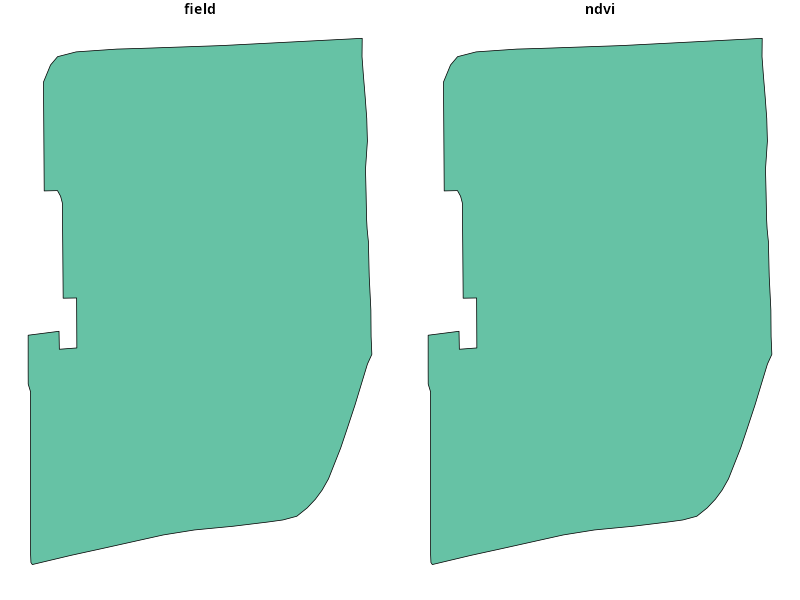

Warning messages:
1: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
2: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data


In [ ]:
# KPI - Greenness
myurl <- ndc_url(option = "KPI_Greenness",
                 params = c(fieldids = "9403114"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))

myres_field <- fromJSON(myres_sf$field, simplifyDataFrame = TRUE)
print(length(myres_field))
print(head(unlist(myres_field)))

cat("\n")

myres_ndvi <- fromJSON(myres_sf$ndvi, simplifyDataFrame = TRUE)
print(dim(myres_ndvi))
print(head(myres_ndvi))

plot(myres_sf)

[1] "https://agrodatacube.wur.nl/api/v2/rest/datapackage/kpi/croprotation?fieldids=9403114"
[1] 3
     fieldid    crop_code         area 
   "9403114"        "265" "40938.2088" 

[1] 12  5
  crop_code_in_year year fieldid_in_year intersected_area     area
1               265 2020         9403114         40938.21 40938.21
2               265 2019         9289293         40902.06 41279.96
3               265 2018         8584057         40938.21 41316.10
4               265 2010         1441244         40676.97 42313.72
5               265 2011         2373534         40677.01 42317.87
6               265 2012         2502970         40855.59 42359.02

[1] 1 7
  cropcode           cropname grondgebruik cropid conflict standard_revenue
1      265 Grasland, blijvend     Grasland    209    FALSE             1250

[1] 1 3
  fieldid index numyears
1 9403114     1        6


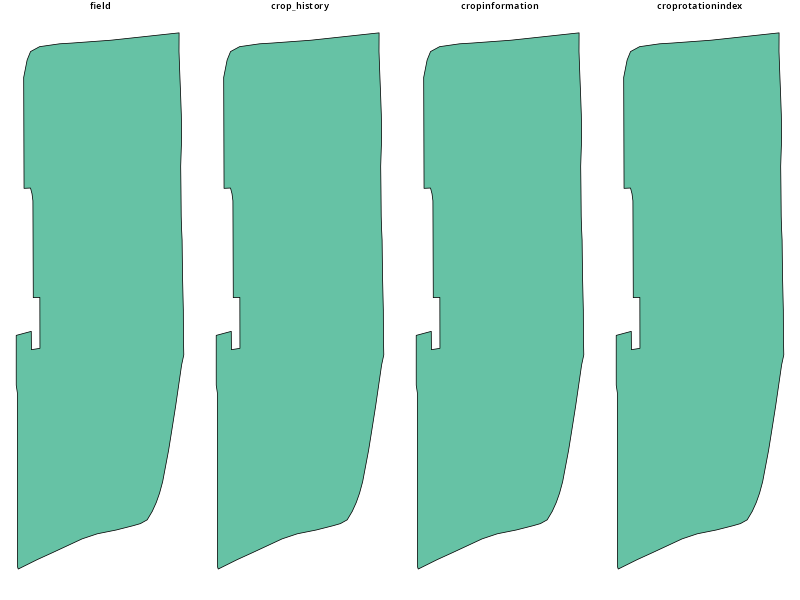

Warning messages:
1: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
2: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
3: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data
4: In st_is_longlat(x) :
  bounding box has potentially an invalid value range for longlat data


In [187]:
# KPI - Croprotation
myurl <- ndc_url(option = "KPI_Croprotation",
                 params = c(fieldids = "9403114"))
print(myurl)

myres <- ndc_get(url = myurl, token = mytoken)
myres_sf <- geojson_sf(toJSON(myres, auto_unbox = TRUE))

myres_field <- fromJSON(myres_sf$field, simplifyDataFrame = TRUE)
print(length(myres_field))
print(head(unlist(myres_field)))

cat("\n")

myres_crophistory <- fromJSON(myres_sf$crop_history, simplifyDataFrame = TRUE)
print(dim(myres_crophistory))
print(head(myres_crophistory))

cat("\n")

myres_cropinformation <- fromJSON(myres_sf$cropinformation, simplifyDataFrame = TRUE)
print(dim(myres_cropinformation))
print(head(myres_cropinformation))

cat("\n")

myres_croprotationindex <- fromJSON(myres_sf$croprotationindex, simplifyDataFrame = TRUE)
print(dim(myres_croprotationindex))
print(head(myres_croprotationindex))

plot(myres_sf)